# Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Step 2 : Import Dataset

In [2]:
df = pd.read_csv("/Users/poojayadav/Downloads/Dentistry Dataset.csv")
print(f"Total number of rows : {df.shape[0]}")
print(f"Total number of columns : {df.shape[1]}")

Total number of rows : 1100
Total number of columns : 14


# Step 3 : Data Preprocessing

In [3]:
# Check for missing values
print(df.isnull().sum())

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64


In [4]:
# Describe the dataset
print(df.describe())

             Sl No  Sample ID          Age  inter canine distance intraoral  \
count  1100.000000        0.0  1100.000000                      1100.000000   
mean    550.500000        NaN    21.625455                        25.989009   
std     317.686953        NaN     2.085892                         1.315292   
min       1.000000        NaN    18.000000                        23.120000   
25%     275.750000        NaN    20.000000                        25.000000   
50%     550.500000        NaN    22.000000                        25.900000   
75%     825.250000        NaN    23.000000                        26.992500   
max    1100.000000        NaN    25.000000                        30.310000   

       intercanine distance casts  right canine width intraoral  \
count                 1100.000000                   1100.000000   
mean                    25.880082                      6.563000   
std                      1.862323                      0.379035   
min                 

In [5]:
# Create dummy variables for the Gender column
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [6]:
# Removing the unnecessary features
df = df.drop(columns=["Sample ID","Sl No"], axis=1)

In [7]:
# Splitting data into features and target variable
X = df.drop("Gender_Male", axis=1)
y = df["Gender_Male"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4 : Model Building with Hyperparameter Tuning

In [8]:
# Define the models and parameters for GridSearchCV
models = {
    'KNN': KNeighborsClassifier(),
    'Bagging': BaggingClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'NaiveBayes': GaussianNB()
}

params = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'Bagging': {'n_estimators': [10, 50, 100]},
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
    'GradientBoosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10, 20]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'NaiveBayes': {}
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, params[model_name], cv=3)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n {classification_report(y_test, y_pred)}")
    print(f"{model_name} Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")

KNN Best Parameters: {'n_neighbors': 3}
KNN Accuracy: 0.9136363636363637
KNN Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.92      0.92       113
        True       0.92      0.91      0.91       107

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220

KNN Confusion Matrix:
 [[104   9]
 [ 10  97]]

Bagging Best Parameters: {'n_estimators': 100}
Bagging Accuracy: 0.9090909090909091
Bagging Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.89      0.91       113
        True       0.89      0.93      0.91       107

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220

Bagging Confusion Matrix:
 [[101  12]
 [  8  99]]

RandomForest Best Parameters: {

# Step 5 : Visualizations

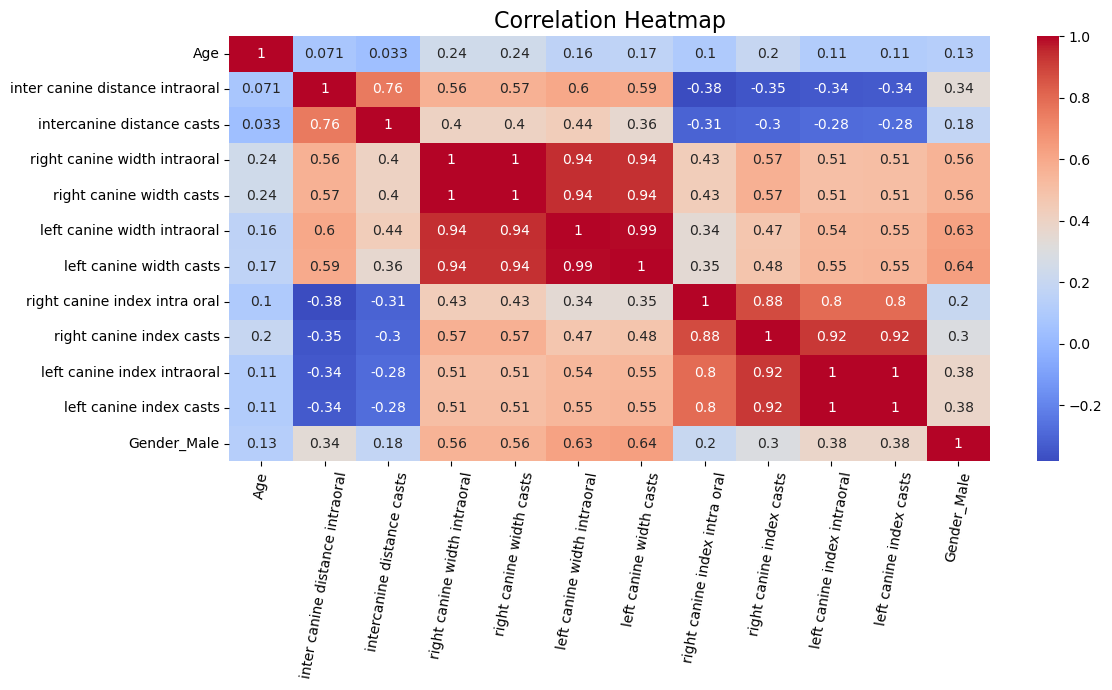

In [9]:
# Correlation matrix
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

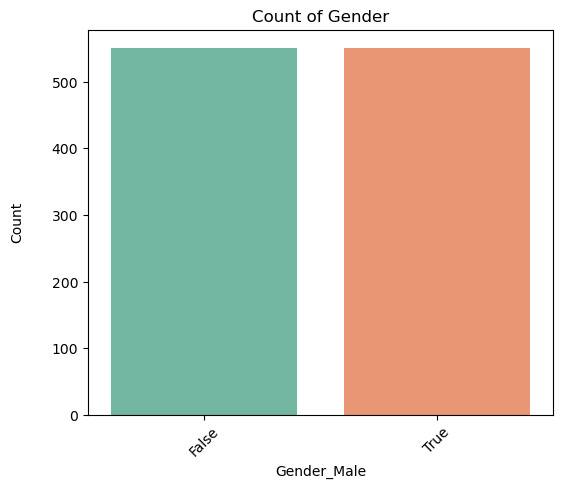

In [10]:
# Count plot for Gender
plt.figure(figsize=(6,5))
sns.countplot(x='Gender_Male', data=df, palette='Set2')
plt.title("Count of Gender")
plt.ylabel("Count", labelpad=20, fontsize=10)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Right Canine Width Intraoral vs Right Canine Index Casts')

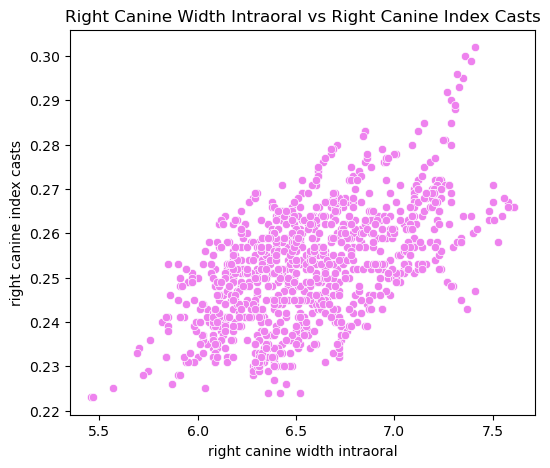

In [11]:
# Scatter plots to show relationships between features
plt.figure(figsize=(6,5))
sns.scatterplot(x="right canine width intraoral", y="right canine index casts", data=df, color='violet')
plt.title("Right Canine Width Intraoral vs Right Canine Index Casts")

Text(0.5, 1.0, 'Right Canine Width Intraoral vs Left Canine Width Intraoral')

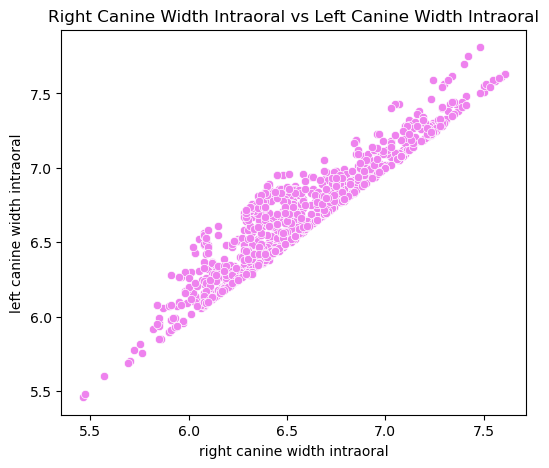

In [12]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="right canine width intraoral", y="left canine width intraoral", data=df, color='violet')
plt.title("Right Canine Width Intraoral vs Left Canine Width Intraoral")

Text(0.5, 1.0, 'Left Canine Width Intraoral vs Left Canine Width Casts')

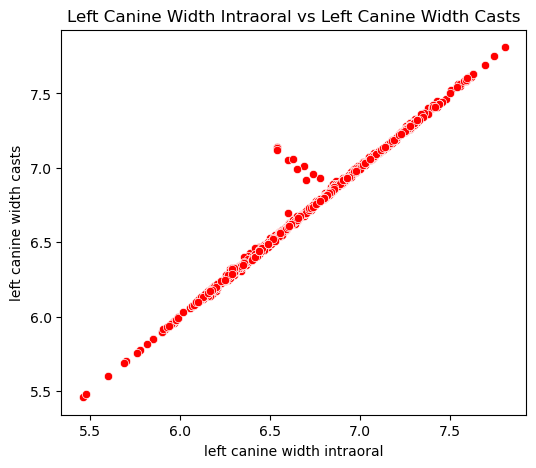

In [13]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="left canine width intraoral", y="left canine width casts", data=df, color='r')
plt.title("Left Canine Width Intraoral vs Left Canine Width Casts")

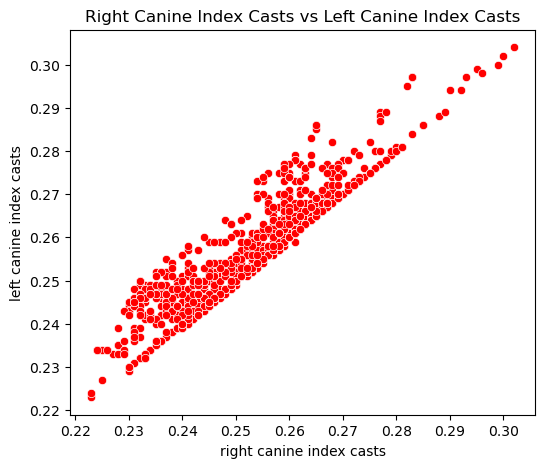

In [14]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="right canine index casts", y="left canine index casts", data=df, color='r')
plt.title("Right Canine Index Casts vs Left Canine Index Casts")

plt.show()

In [15]:
# Step 6: Conclusion
for model_name, result in results.items():
    print(f"{model_name} - Best Parameters: {result['Best Parameters']}")
    print(f"{model_name} - Accuracy: {result['Accuracy']}")
    print(f"{model_name} - Classification Report:\n {result['Classification Report']}")
    print(f"{model_name} - Confusion Matrix:\n {result['Confusion Matrix']}\n")

KNN - Best Parameters: {'n_neighbors': 3}
KNN - Accuracy: 0.9136363636363637
KNN - Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.92      0.92       113
        True       0.92      0.91      0.91       107

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220

KNN - Confusion Matrix:
 [[104   9]
 [ 10  97]]

Bagging - Best Parameters: {'n_estimators': 100}
Bagging - Accuracy: 0.9090909090909091
Bagging - Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.89      0.91       113
        True       0.89      0.93      0.91       107

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220

Bagging - Confusion Matrix:
 [[101  12]
 [  8  99]]

RandomForest - 

In [16]:
# Displaying the summary results
summary = pd.DataFrame.from_dict(results, orient='index', columns=['Best Parameters', 'Accuracy', 'Classification Report', 'Confusion Matrix'])
print(summary[['Accuracy']])

                    Accuracy
KNN                 0.913636
Bagging             0.909091
RandomForest        0.895455
XGBoost             0.895455
GradientBoosting    0.886364
SVC                 0.886364
LogisticRegression  0.845455
DecisionTree        0.854545
AdaBoost            0.827273
NaiveBayes          0.777273


## Conclusion:
Based on the results, the Bagging Classifier emerged as the best model for gender classification with the highest accuracy of 0.918182. It is closely followed by KNN and Random Forest, which also provided strong performances. Ensemble methods such as Bagging, Random Forest, and Gradient Boosting generally performed better than individual models, indicating the benefit of combining multiple models to improve prediction accuracy.

The differences in accuracy highlight the importance of trying various algorithms and hyperparameter tuning to achieve the best performance. The results also suggest that the dataset is well-suited for classification tasks using ensemble methods and similarity-based approaches like KNN.